In [1]:
import matplotlib.pyplot as plt
from random import randint as rand # If someone wants a random year
from mpl_toolkits.mplot3d import Axes3D

In [17]:
def getInfo(write_to_file=False):
    from selenium import webdriver
    # browser = webdriver.Chrome(r'/home/order/Videos/chromedriver/chromedriver') # Linux
    browser = webdriver.Chrome(r'C:\Users\Syris Norelli\Downloads\ChromeDriver\ChromeDriver.exe') # Windows
    browser.get('ftp://k7moa.com/junkord/HANDSL01114A20_STAND_ALONE_31.DAT')
    browser.implicitly_wait(30)
    text = browser.find_element_by_css_selector('body').text # It's just a text document
    browser.close()
    if write_to_file == True:
        with open('congressdata.txt','w') as cdata:
            cdata.write(text)
        print('Wrote to file!')
    return text

# text = getInfo(write_to_file=True) # If you want to get the data from online
with open('congressdata.txt','r') as cdata: # If you want to get the data from saved file
    text = cdata.read()

Congress 114: (2015-2016)


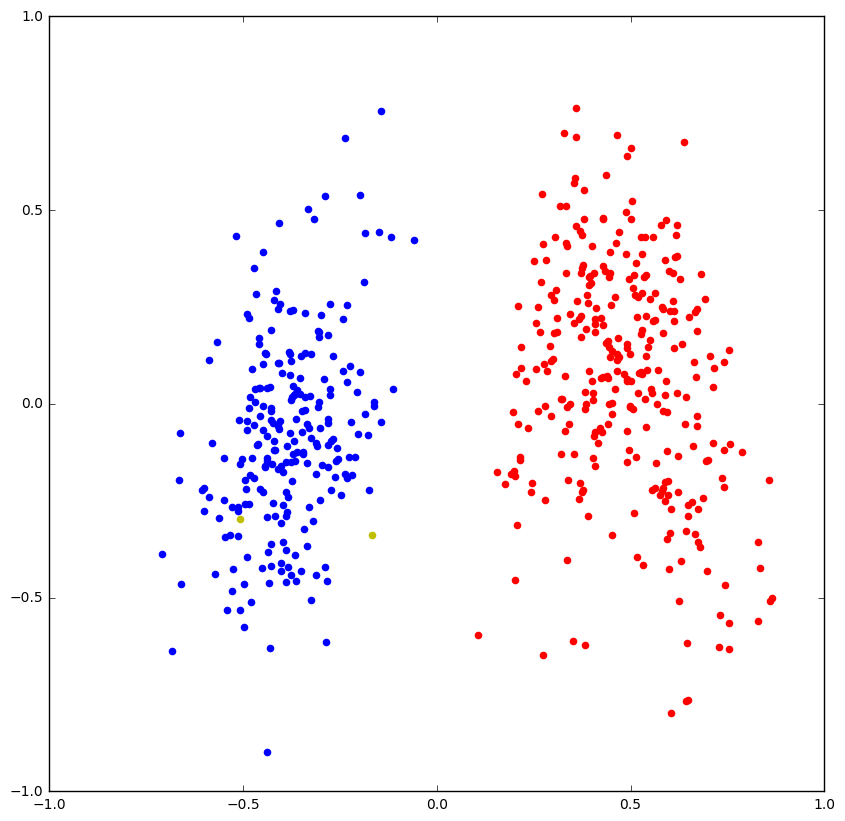

In [18]:
def make_nice(congress_list):
    sliced = [[x[1:4], x[7:12], x[14:16], x[19], x[22:29], x[33:36], x[38], x[41], x[45:55], x[59:65], x[68:74], x[79:89], x[92:96], x[100:103], x[107:]] for x in congress_list]
    sliced = [[y.strip(' ') for y in x] for x in sliced]
    numbers = [[int(x[0]),int(x[1]),int(x[2]),int(x[3]),x[4],int(x[5]),int(x[6]),int(x[7]),x[8],float(x[9]),float(x[10]),float(x[11]),int(x[12]),int(x[13]),float(x[14])] for x in sliced]
    return numbers

def show_congress(congress, table):
    if isinstance(congress,int) == True:
        congress = str(congress)
    assert isinstance(congress, float) == False, 'There is no congress ' + congress + '. Use an int next time'
    current_congress = [x for x in table if x[1:4].strip(' ') == congress]
    numbers = make_nice(current_congress)
    
    # Information for congress_years grabbed from https://www.senate.gov/reference/Years_to_Congress.htm
    congress_years = [[1, '1789-1790'], [2, '1791-1792'], [3, '1793-1794'], [4, '1795-1796'], [5, '1797-1798'], [6, '1799-1800'], [7, '1801-1802'], [8, '1803-1804'], 
     [9, '1805-1806'], [10, '1807-1808'], [11, '1809-1810'], [12, '1811-1812'], [13, '1813-1814'], [14, '1815-1816'], [15, '1817-1818'], [16, '1819-1820'], 
     [17, '1821-1822'], [18, '1823-1824'], [19, '1825-1826'], [20, '1827-1828'], [21, '1829-1830'], [22, '1831-1832'], [23, '1833-1834'], [24, '1835-1836'], 
     [25, '1837-1838'], [26, '1839-1840'], [27, '1841-1842'], [28, '1843-1844'], [29, '1845-1846'], [30, '1847-1848'], [31, '1849-1850'], [32, '1851-1852'], 
     [33, '1853-1854'], [34, '1855-1856'], [35, '1857-1858'], [36, '1859-1860'], [37, '1861-1862'], [38, '1863-1864'], [39, '1865-1866'], [40, '1867-1868'], 
     [41, '1869-1870'], [42, '1871-1872'], [43, '1873-1874'], [44, '1875-1876'], [45, '1877-1878'], [46, '1879-1880'], [47, '1881-1882'], [48, '1883-1884'], 
     [49, '1885-1886'], [50, '1887-1888'], [51, '1889-1890'], [52, '1891-1892'], [53, '1893-1894'], [54, '1895-1896'], [55, '1897-1898'], [56, '1899-1900'], 
     [57, '1901-1902'], [58, '1903-1904'], [59, '1905-1906'], [60, '1907-1908'], [61, '1909-1910'], [62, '1911-1912'], [63, '1913-1914'], [64, '1915-1916'], 
     [65, '1917-1918'], [66, '1919-1920'], [67, '1921-1922'], [68, '1923-1924'], [69, '1925-1926'], [70, '1927-1928'], [71, '1929-1930'], [72, '1931-1932'], 
     [73, '1933-1934'], [74, '1935-1936'], [75, '1937-1938'], [76, '1939-1940'], [77, '1941-1942'], [78, '1943-1944'], [79, '1945-1946'], [80, '1947-1948'], 
     [81, '1949-1950'], [82, '1951-1952'], [83, '1953-1954'], [84, '1955-1956'], [85, '1957-1958'], [86, '1959-1960'], [87, '1961-1962'], [88, '1963-1964'], 
     [89, '1965-1966'], [90, '1967-1968'], [91, '1969-1970'], [92, '1971-1972'], [93, '1973-1974'], [94, '1975-1976'], [95, '1977-1978'], [96, '1979-1980'], 
     [97, '1981-1982'], [98, '1983-1984'], [99, '1985-1986'], [100, '1987-1988'], [101, '1989-1990'], [102, '1991-1992'], [103, '1993-1994'], [104, '1995-1996'], 
     [105, '1997-1998'], [106, '1999-2000'], [107, '2001-2002'], [108, '2003-2004'], [109, '2005-2006'], [110, '2007-2008'], [111, '2009-2010'], [112, '2011-2012'], 
     [113, '2013-2014'], [114, '2015-2016'], [115, '2017-2018']]
    
    specific_years = congress_years[int(congress)-1][1]
    print('Congress ' + congress + ': (' + specific_years + ')')
    # plt.clf() # Probably unnecessary in Jupyter
    dems = [[x[9],x[10]] for x in numbers if x[5] == 100]
    repubs = [[x[9],x[10]] for x in numbers if x[5] == 200]
    others = [[x[9],x[10]] for x in numbers if x[5] != 100 and x[5] != 200]
    plt.scatter([x[0] for x in dems], [x[1] for x in dems], color='b')
    plt.scatter([x[0] for x in repubs], [x[1] for x in repubs], color='r')
    plt.scatter([x[0] for x in others], [x[1] for x in others], color='y')
    plt.axis([-1, 1, -1, 1])
    plt.show()
main_table = text.split('\n')

chart_size = 10
plt.rcParams['figure.figsize'] = (chart_size,chart_size)
show_congress(114, main_table)
# for i in range(1,115):
#     #print('Congress ' + str(i) + ':')
#     show_congress(i, main_table)